# Exploratory Data Analysis and Visualization

## Installing Required Dependencies

In [31]:
import warnings
warnings.filterwarnings('ignore')
!pip install wordcloud
!pip install yellowbrick

  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-gmzrjcqg/MulticoreTSNE/setup.py'"'"'; __file__='"'"'/tmp/pip-install-gmzrjcqg/MulticoreTSNE/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-k5w33ebv
       cwd: /tmp/pip-install-gmzrjcqg/MulticoreTSNE/
  Complete output (22 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/MulticoreTSNE
  copying MulticoreTSNE/__init__.py -> build/lib.linux-x86_64-3.6/MulticoreTSNE
  creating build/lib.linux-x86_64-3.6/MulticoreTSNE/tests
  copying MulticoreTSNE/tests/__init__.py -> build/lib.linux-x86_64-3.6/MulticoreTSNE/tests
  copying MulticoreTSNE/tests/test_base.py -> build/lib.linux-

## Importing Necessary Libraries

In [2]:
import csv
import os
import random
import json
import numpy as np
import pandas as pd
import datetime as dt
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import gc
import seaborn as sns
color = sns.color_palette()

eng_stopwords = set(stopwords.words("english"))

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import re, string
from sklearn.metrics import log_loss
%matplotlib inline

print('Python version:',np.version)
print('Pandas version:',pd.__version__)

[nltk_data] Downloading package stopwords to /home/ansh23/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Python version: <module 'numpy.version' from '/home/ansh23/.local/lib/python3.6/site-packages/numpy/version.py'>
Pandas version: 0.24.1


## Let us have a look at the data obtained

In [3]:
%matplotlib inline

df = pd.read_csv('../Data/data.csv')
df.head()

,author,authors,body,comment,comms_num,created,flair,id,score,title,url,combined_features
0,sanand_satwik,hashedram diabapp xataari Aashayrao sarcrasti...,hiits really tough time everyone recently lost...,im freelancer dont listen idiots cant freelanc...,134,1.586742e+09,AskIndia,g014wc,1049,lost job sick mother paralysed dad lockdown ea...,https://www.reddit.com/r/india/comments/g014wc...,lost job sick mother paralysed dad lockdown ea...
1,TWO-WHEELER-MAFIA,Kinky-Monk ak32009 fools_eye None DwncstSheep...,floods terrorist attacks famines due lack rain...,dont understand dont use money contingency fun...,204,1.586448e+09,AskIndia,fxofyu,643,government come begging bowl every crisis,https://www.reddit.com/r/india/comments/fxofyu...,government come begging bowl every crisisdont ...
2,sanand_satwik,AlternativeDrop6 TheRobotsHaveCome lanky32 pl...,hi folks really appreciate warm response previ...,anyone knows influential twitter bangalore ple...,94,1.586871e+09,AskIndia,g0zlly,764,mothers condition going worse due hepatitis b ...,https://www.reddit.com/r/india/comments/g0zlly...,mothers condition going worse due hepatitis b ...
3,GauGau24,Best-Economist Srthak_ ppccbba tb33296 damnji...,dont think weve spend much time family long ti...,yesterday major fight wife mom mominlaw father...,117,1.587384e+09,AskIndia,g4lrhm,158,people stuck family lockdown family falling apart,https://www.reddit.com/r/india/comments/g4lrhm...,people stuck family lockdown family falling ap...
4,indianoogler,RedDevil-84 khushraho kingof-potatos congrats...,corona virus given time think life choices bit...,plan finances work enjoy ways healthy go see w...,206,1.586207e+09,AskIndia,fvy95j,266,men 30+ decided get married plan old age,https://www.reddit.com/r/india/comments/fvy95j...,men 30+ decided get married plan old ageplan f...


## Creating a JSON instance of the data obtained

In [3]:
df.to_json (r'../Data/data-json.json')

## Let us observe the different types of variables we have and how each is described

In [37]:
# Checking the data type
df.dtypes

author                object
authors               object
body                  object
comment               object
comms_num              int64
created              float64
flair                 object
id                    object
score                  int64
title                 object
url                   object
combined_features     object
dtype: object

### Lets observe the different features we have:
```
1. author - Author name
2. comments - list of top comments (limited to 10)
3. created_utc - timestamp of creation of post
4. link_flair_text - flair of the post
5. num_comments - number of comments
6. over_18 - described as whether post is age restricted or not
7. score - calculated as upvotes - downvotes
8. selftext - body of the post
9. title - title of the post
10. url - url associated with the post
```

## Let us observe one instance of the data

In [32]:
df.head(1)

,author,authors,body,comment,comms_num,created,flair,id,score,title,url,combined_features
timestamp,,,,,,,,,,,,
2020-04-13 07:12:28,sanand_satwik,hashedram diabapp xataari Aashayrao sarcrasti...,hiits really tough time everyone recently lost...,im freelancer dont listen idiots cant freelanc...,134,1.586742e+09,AskIndia,g014wc,1049,lost job sick mother paralysed dad lockdown ea...,https://www.reddit.com/r/india/comments/g014wc...,lost job sick mother paralysed dad lockdown ea...


## Head Count of Each type of Flair Present in our Data

AskIndia  =  200
Non-Political  =  200
[R]eddiquette  =  0
Scheduled  =  200
Photography  =  200
Science/Technology  =  200
Politics  =  200
Business/Finance  =  200
Policy/Economy  =  200
Sports  =  200
Food  =  4
AMA  =  0

NaN in - 

author                0
authors              87
body                  0
comment              87
comms_num             0
created               0
flair                 0
id                    0
score                 0
title                 0
url                   0
combined_features     0
dtype: int64


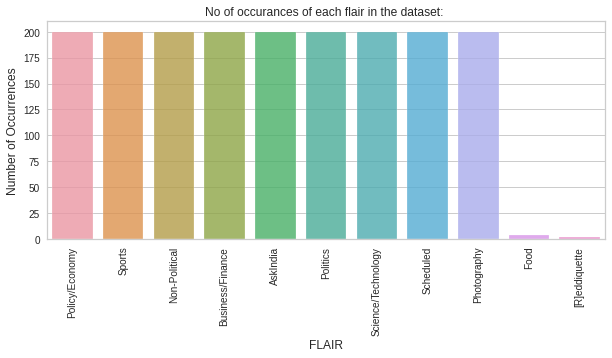

In [33]:
import seaborn as sns
cnt_pro = df['flair'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)

plt.title("No of occurances of each flair in the dataset: ")
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FLAIR', fontsize=12)


flairs = [ "AskIndia", "Non-Political", "[R]eddiquette",
          "Scheduled", "Photography", "Science/Technology",
          "Politics", "Business/Finance", "Policy/Economy",
          "Sports", "Food", "AMA"]

for i in flairs:
    print(i, " = " ,int(df.flair.str.count(i).sum()))


print("")   
print("NaN in - ")
print("")    
print(df.isna().sum())

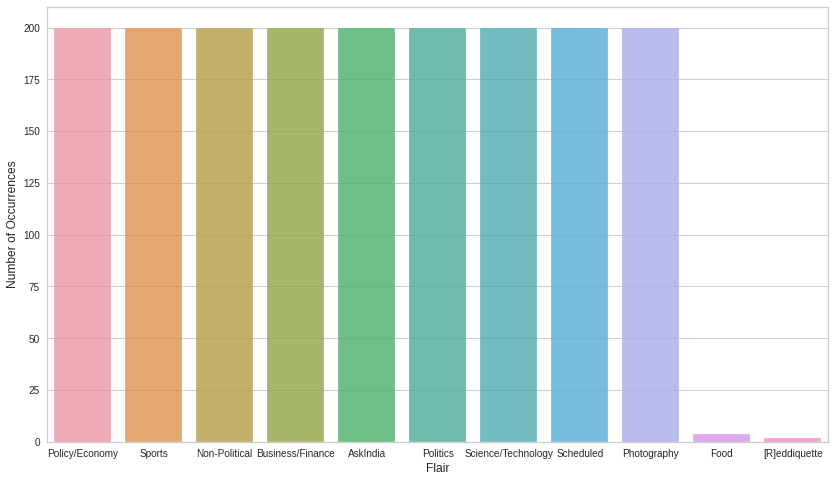

In [35]:
cnt_srs = df['flair'].value_counts()

plt.figure(figsize=(14,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Flair', fontsize=12)
plt.show()

### This shows us the lack of data points categorized under flairs [R]eddiquette, Food, and AMA. 
### Hence, this also indicates a slight imbalance in the data obtained.

## A Pie-Chart representation of Posts under various Flairs

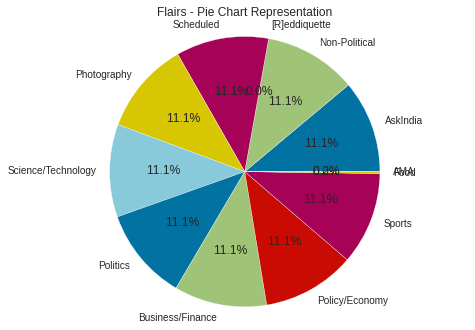

In [74]:
Tasks = [200,200,0,200,200,200,200,200,200,200,4,0] 
plt.pie(Tasks,labels=flairs,autopct='%1.1f%%')
plt.title('Flairs - Pie Chart Representation')
plt.axis('equal')
plt.show()

## Scatter Plot of Number of Comments made vs Score 

No handles with labels found to put in legend.


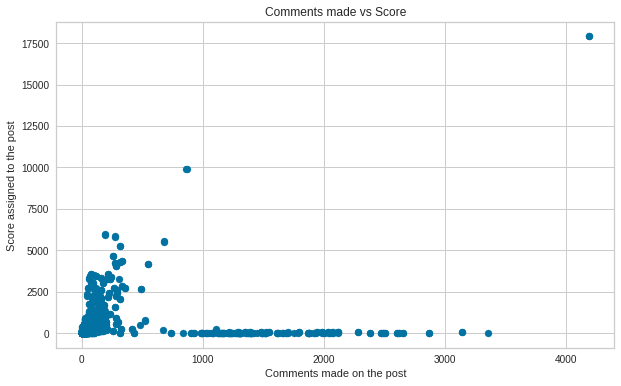

In [99]:
# Plotting a scatter plot - USER BEHAVIOR CAN BE SEEN AS TO WHICH FLAIR HE/SHE PREFERS
fig, ax = plt.subplots(figsize=(10,6))
# x = df['id']
x= df['comms_num']
y = df['score']
ax.scatter(x,y)
plt.title("Comments made vs Score")
plt.xlabel("Comments made on the post")
plt.ylabel("Score assigned to the post")
# ax.set_xlabel(‘id’)
# ax.yaxis.set_label(‘score’)
ax.legend()
plt.show()

### This shows that number of comments made is not directly correlated to the score of the post which would have been easily assumed unless proven otherwise (which this plot highlights).

## Count of number of Rows corresponding to each Feature

In [42]:
# Used to count the number of rows corresponding to each feature
df.count()

author               1806
authors              1719
body                 1806
comment              1719
comms_num            1806
created              1806
flair                1806
id                   1806
score                1806
title                1806
url                  1806
combined_features    1806
dtype: int64

## Dropping Duplicate Data points

In [44]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.head(5)

,author,authors,body,comment,comms_num,created,flair,id,score,title,url,combined_features
timestamp,,,,,,,,,,,,
2020-04-13 07:12:28,sanand_satwik,hashedram diabapp xataari Aashayrao sarcrasti...,hiits really tough time everyone recently lost...,im freelancer dont listen idiots cant freelanc...,134,1.586742e+09,AskIndia,g014wc,1049,lost job sick mother paralysed dad lockdown ea...,https://www.reddit.com/r/india/comments/g014wc...,lost job sick mother paralysed dad lockdown ea...
2020-04-09 21:34:21,TWO-WHEELER-MAFIA,Kinky-Monk ak32009 fools_eye None DwncstSheep...,floods terrorist attacks famines due lack rain...,dont understand dont use money contingency fun...,204,1.586448e+09,AskIndia,fxofyu,643,government come begging bowl every crisis,https://www.reddit.com/r/india/comments/fxofyu...,government come begging bowl every crisisdont ...
2020-04-14 18:56:11,sanand_satwik,AlternativeDrop6 TheRobotsHaveCome lanky32 pl...,hi folks really appreciate warm response previ...,anyone knows influential twitter bangalore ple...,94,1.586871e+09,AskIndia,g0zlly,764,mothers condition going worse due hepatitis b ...,https://www.reddit.com/r/india/comments/g0zlly...,mothers condition going worse due hepatitis b ...
2020-04-20 17:27:09,GauGau24,Best-Economist Srthak_ ppccbba tb33296 damnji...,dont think weve spend much time family long ti...,yesterday major fight wife mom mominlaw father...,117,1.587384e+09,AskIndia,g4lrhm,158,people stuck family lockdown family falling apart,https://www.reddit.com/r/india/comments/g4lrhm...,people stuck family lockdown family falling ap...
2020-04-07 02:26:25,indianoogler,RedDevil-84 khushraho kingof-potatos congrats...,corona virus given time think life choices bit...,plan finances work enjoy ways healthy go see w...,206,1.586207e+09,AskIndia,fvy95j,266,men 30+ decided get married plan old age,https://www.reddit.com/r/india/comments/fvy95j...,men 30+ decided get married plan old ageplan f...


## Count after removing Duplicates

In [47]:
# After removing duplicate entries
df.count()

author               1648
authors              1572
body                 1648
comment              1572
comms_num            1648
created              1648
flair                1648
id                   1648
score                1648
title                1648
url                  1648
combined_features    1648
dtype: int64

## Removing Null and Missing data points

In [49]:
# Finding the null values.
print(df.isnull().sum())

author                0
authors              76
body                  0
comment              76
comms_num             0
created               0
flair                 0
id                    0
score                 0
title                 0
url                   0
combined_features     0
dtype: int64


## Count after Dropping the Missing Values

In [51]:
# Dropping the missing values.
df = df.dropna() 
df.count()

author               1572
authors              1572
body                 1572
comment              1572
comms_num            1572
created              1572
flair                1572
id                   1572
score                1572
title                1572
url                  1572
combined_features    1572
dtype: int64

## Detecting outliers via Box Plot Diagram
### Here we see the outliers based on the number of comments made i.e. which post stand out on the basis of number of comments made / responded to in that post.

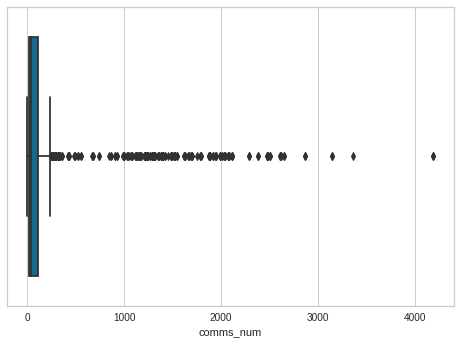

In [70]:
# Detecting outliers
sns.boxplot(x=df['comms_num'])

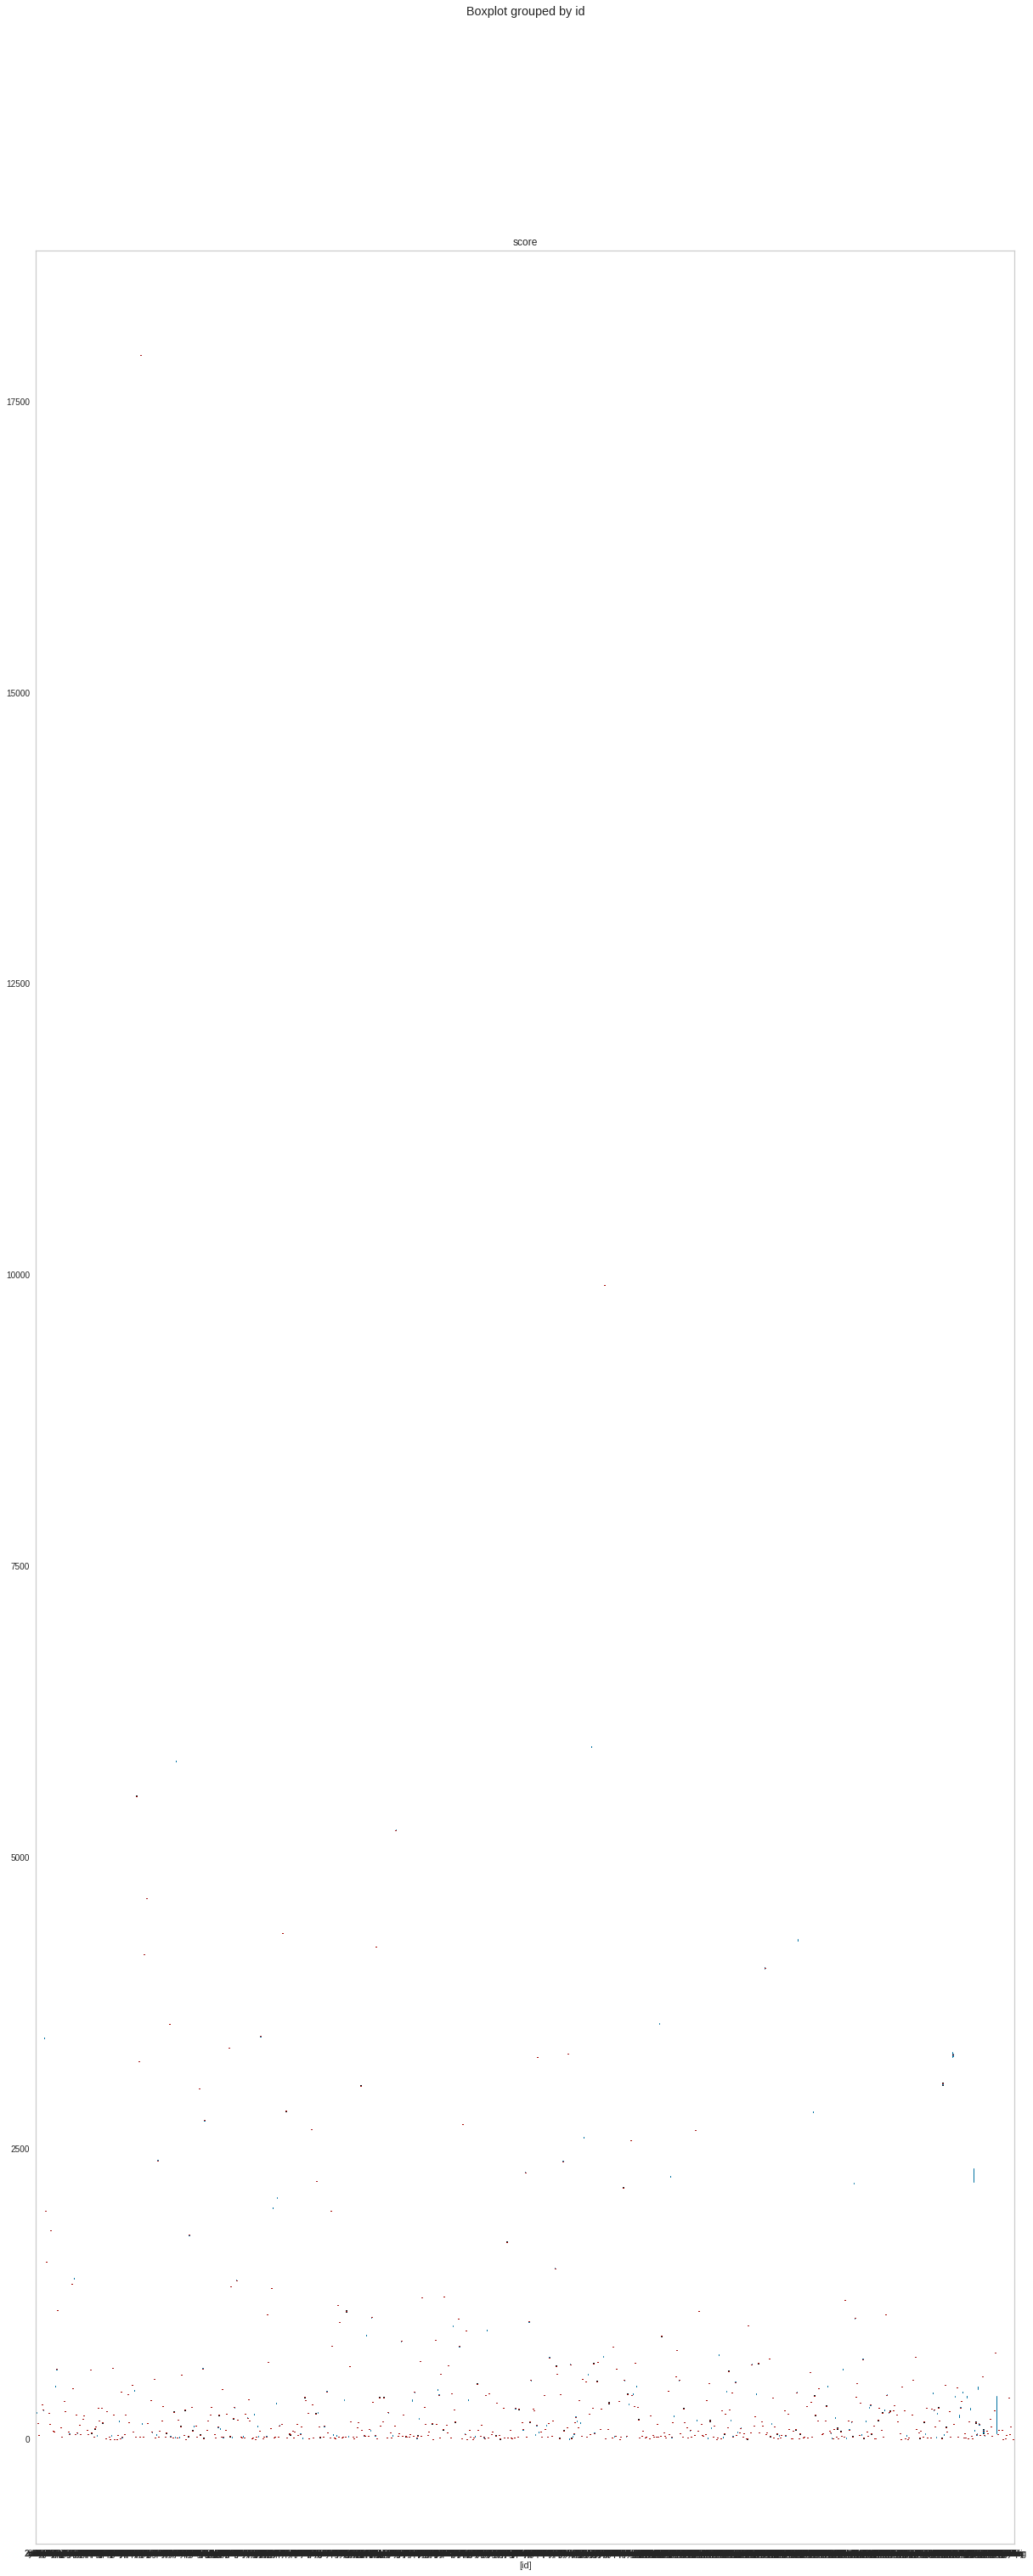

In [68]:
# Detecting outliers
# import seaborn as sns
df.boxplot(by=['id'], column =['score'], grid = False, figsize = (20,50))
# plt.figure(figsize=(20,10))

## Plot of Number of Words (in title) vs  Number of Posts  

Text(0, 0.5, 'length of Title (in words)')

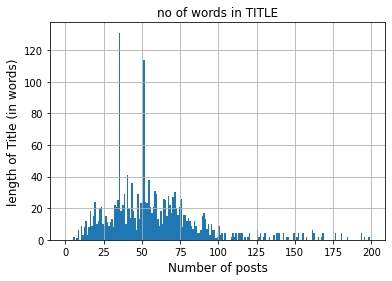

In [4]:
# distribution of no of words in title

temp = df.title.str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("Number of posts", fontsize=12)
plt.ylabel("length of Title (in words)", fontsize=12)

## Plot of Number of Words (in body) vs  Number of Posts  

number with no body = 1132
number with body = 58541
As we can see, most of the posts do not have a body or their length is negligible


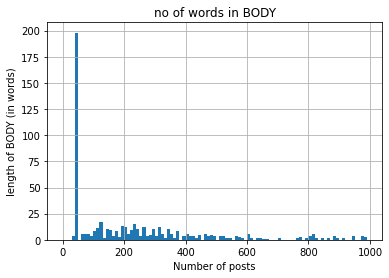

In [5]:


# distribution of no. of words in body
print("number with no body =",df['body'].isnull().sum())
print("number with body =",59673 - df['body'].isnull().sum())


temp = df.body.str.len()
temp.hist(bins = np.arange(0,1000,10))
plt.title("no of words in BODY")
plt.xlabel("Number of posts")
plt.ylabel("length of BODY (in words)")


print("As we can see, most of the posts do not have a body or their length is negligible")



among the one with body - most of them have words from 20 to 200


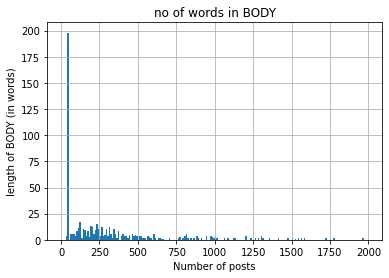

In [6]:
# distribution of no. of words in body 

temp = df.body.str.len()
temp.hist(bins = np.arange(10,2000,10))
plt.title("no of words in BODY")
plt.xlabel("Number of posts")
plt.ylabel("length of BODY (in words)")


print("among the one with body - most of them have words from 20 to 200")

## Plot of Number of Upvotes vs Number of Posts

Text(0, 0.5, 'Number of upvotes')

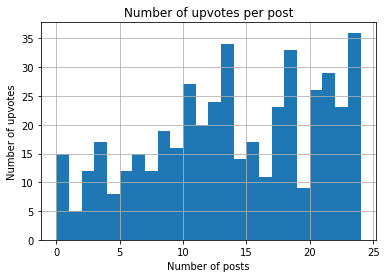

In [7]:


temp = df.score
temp.hist(bins = np.arange(0,25,1))
plt.title("Number of upvotes per post")
plt.xlabel("Number of posts")
plt.ylabel("Number of upvotes")



## Plot of Number of Comments vs Number of Posts

Text(0, 0.5, 'Number of Comments')

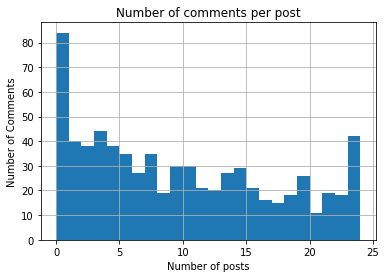

In [8]:
temp = df.comms_num
temp.hist(bins = np.arange(0,25,1))


plt.title("Number of comments per post")
plt.xlabel("Number of posts")
plt.ylabel("Number of Comments")

In [11]:
df.dtypes

author                object
authors               object
body                  object
comment               object
comms_num              int64
created              float64
flair                 object
id                    object
score                  int64
title                 object
url                   object
combined_features     object
dtype: object

## Box-Plot diagram based on Score to detect Posts with very low or very high Score

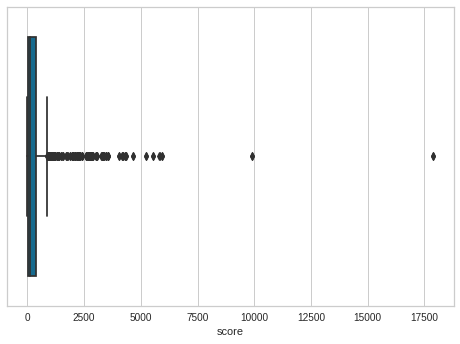

In [71]:
sns.boxplot(x=df['score'])

## Getting Data based on their Timestamp

In [13]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

## Observing Chronological Data

In [14]:


df['timestamp'] = df['created'].apply(get_date)
df.head()



,author,authors,body,comment,comms_num,created,flair,id,score,title,url,combined_features,timestamp
0,sanand_satwik,hashedram diabapp xataari Aashayrao sarcrasti...,hiits really tough time everyone recently lost...,im freelancer dont listen idiots cant freelanc...,134,1.586742e+09,AskIndia,g014wc,1049,lost job sick mother paralysed dad lockdown ea...,https://www.reddit.com/r/india/comments/g014wc...,lost job sick mother paralysed dad lockdown ea...,2020-04-13 07:12:28
1,TWO-WHEELER-MAFIA,Kinky-Monk ak32009 fools_eye None DwncstSheep...,floods terrorist attacks famines due lack rain...,dont understand dont use money contingency fun...,204,1.586448e+09,AskIndia,fxofyu,643,government come begging bowl every crisis,https://www.reddit.com/r/india/comments/fxofyu...,government come begging bowl every crisisdont ...,2020-04-09 21:34:21
2,sanand_satwik,AlternativeDrop6 TheRobotsHaveCome lanky32 pl...,hi folks really appreciate warm response previ...,anyone knows influential twitter bangalore ple...,94,1.586871e+09,AskIndia,g0zlly,764,mothers condition going worse due hepatitis b ...,https://www.reddit.com/r/india/comments/g0zlly...,mothers condition going worse due hepatitis b ...,2020-04-14 18:56:11
3,GauGau24,Best-Economist Srthak_ ppccbba tb33296 damnji...,dont think weve spend much time family long ti...,yesterday major fight wife mom mominlaw father...,117,1.587384e+09,AskIndia,g4lrhm,158,people stuck family lockdown family falling apart,https://www.reddit.com/r/india/comments/g4lrhm...,people stuck family lockdown family falling ap...,2020-04-20 17:27:09
4,indianoogler,RedDevil-84 khushraho kingof-potatos congrats...,corona virus given time think life choices bit...,plan finances work enjoy ways healthy go see w...,206,1.586207e+09,AskIndia,fvy95j,266,men 30+ decided get married plan old age,https://www.reddit.com/r/india/comments/fvy95j...,men 30+ decided get married plan old ageplan f...,2020-04-07 02:26:25


## Observing Timestamp of Each Post

In [15]:


df = df.set_index('timestamp')
df.head()



,author,authors,body,comment,comms_num,created,flair,id,score,title,url,combined_features
timestamp,,,,,,,,,,,,
2020-04-13 07:12:28,sanand_satwik,hashedram diabapp xataari Aashayrao sarcrasti...,hiits really tough time everyone recently lost...,im freelancer dont listen idiots cant freelanc...,134,1.586742e+09,AskIndia,g014wc,1049,lost job sick mother paralysed dad lockdown ea...,https://www.reddit.com/r/india/comments/g014wc...,lost job sick mother paralysed dad lockdown ea...
2020-04-09 21:34:21,TWO-WHEELER-MAFIA,Kinky-Monk ak32009 fools_eye None DwncstSheep...,floods terrorist attacks famines due lack rain...,dont understand dont use money contingency fun...,204,1.586448e+09,AskIndia,fxofyu,643,government come begging bowl every crisis,https://www.reddit.com/r/india/comments/fxofyu...,government come begging bowl every crisisdont ...
2020-04-14 18:56:11,sanand_satwik,AlternativeDrop6 TheRobotsHaveCome lanky32 pl...,hi folks really appreciate warm response previ...,anyone knows influential twitter bangalore ple...,94,1.586871e+09,AskIndia,g0zlly,764,mothers condition going worse due hepatitis b ...,https://www.reddit.com/r/india/comments/g0zlly...,mothers condition going worse due hepatitis b ...
2020-04-20 17:27:09,GauGau24,Best-Economist Srthak_ ppccbba tb33296 damnji...,dont think weve spend much time family long ti...,yesterday major fight wife mom mominlaw father...,117,1.587384e+09,AskIndia,g4lrhm,158,people stuck family lockdown family falling apart,https://www.reddit.com/r/india/comments/g4lrhm...,people stuck family lockdown family falling ap...
2020-04-07 02:26:25,indianoogler,RedDevil-84 khushraho kingof-potatos congrats...,corona virus given time think life choices bit...,plan finances work enjoy ways healthy go see w...,206,1.586207e+09,AskIndia,fvy95j,266,men 30+ decided get married plan old age,https://www.reddit.com/r/india/comments/fvy95j...,men 30+ decided get married plan old ageplan f...


## Progression of Number of Comments with Time

Text(0, 0.5, 'Number of comments')

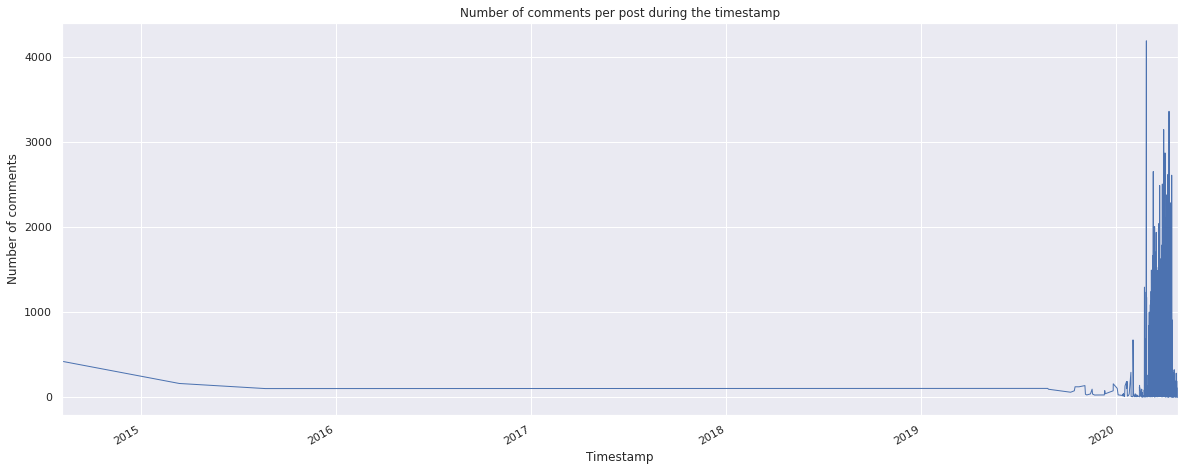

In [16]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 8)})

df['comms_num'].plot(linewidth=1);


plt.title("Number of comments per post during the timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Number of comments")



### This shows how activity on a post has increased with time, year by year.

## Number of Upvotes vs Number of Comments

No handles with labels found to put in legend.


flair
AskIndia              AxesSubplot(0.125,0.125;0.775x0.755)
Business/Finance      AxesSubplot(0.125,0.125;0.775x0.755)
Food                  AxesSubplot(0.125,0.125;0.775x0.755)
Non-Political         AxesSubplot(0.125,0.125;0.775x0.755)
Photography           AxesSubplot(0.125,0.125;0.775x0.755)
Policy/Economy        AxesSubplot(0.125,0.125;0.775x0.755)
Politics              AxesSubplot(0.125,0.125;0.775x0.755)
Scheduled             AxesSubplot(0.125,0.125;0.775x0.755)
Science/Technology    AxesSubplot(0.125,0.125;0.775x0.755)
Sports                AxesSubplot(0.125,0.125;0.775x0.755)
[R]eddiquette         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

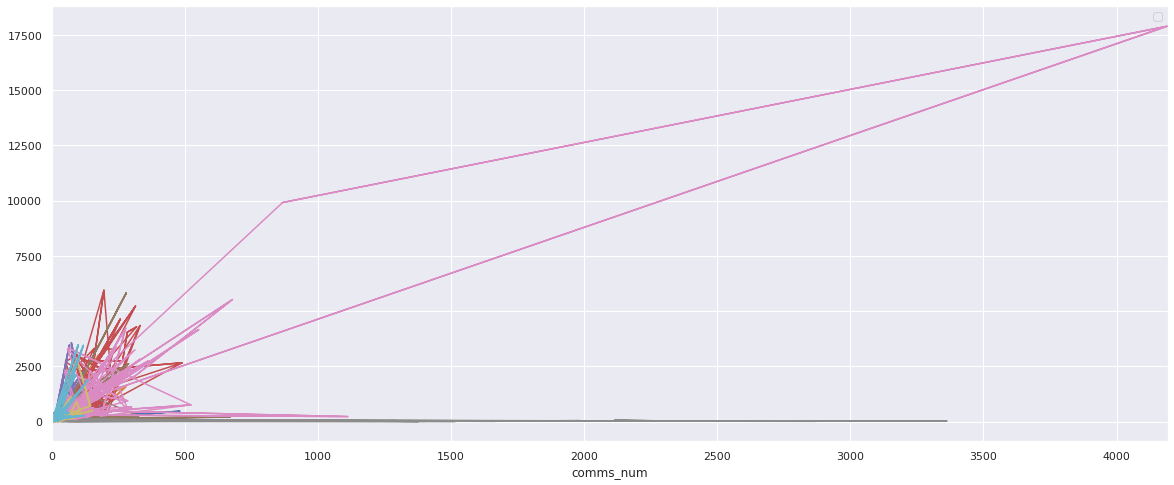

In [17]:
fig, ax = plt.subplots()
plt.legend()
df.groupby('flair').plot(x='comms_num', y='score',  ax=ax, legend=False)



### We can see a linear relation between no: of upvotes and no: of comments which indicates a trendy post has more of both

## Average Number of Upvotes per Flair

,score
flair,
AskIndia,110.655
Business/Finance,213.045
Food,88.000
Non-Political,1219.565
Photography,342.730
Policy/Economy,291.610
Politics,1121.360
Scheduled,21.820
Science/Technology,131.595


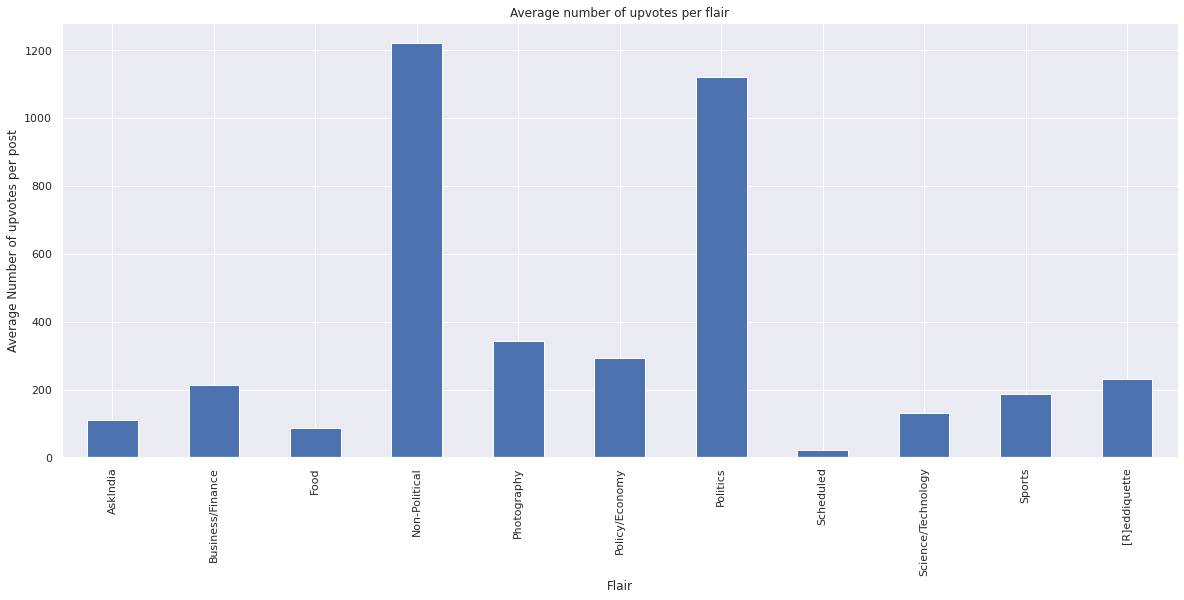

In [18]:
df2 = df.groupby("flair").mean()[['score']]

df2.plot(kind='bar', legend=False, grid=True)
plt.title("Average number of upvotes per flair")

plt.xlabel("Flair")
plt.ylabel("Average Number of upvotes per post")
#plt.savefig('images/10.png')

df2.head(10)

## Average Number of Comments per Post

,comms_num
flair,
AskIndia,59.945
Business/Finance,37.410
Food,128.000
Non-Political,113.455
Photography,20.240
Policy/Economy,50.600
Politics,189.615
Scheduled,1408.900
Science/Technology,24.620


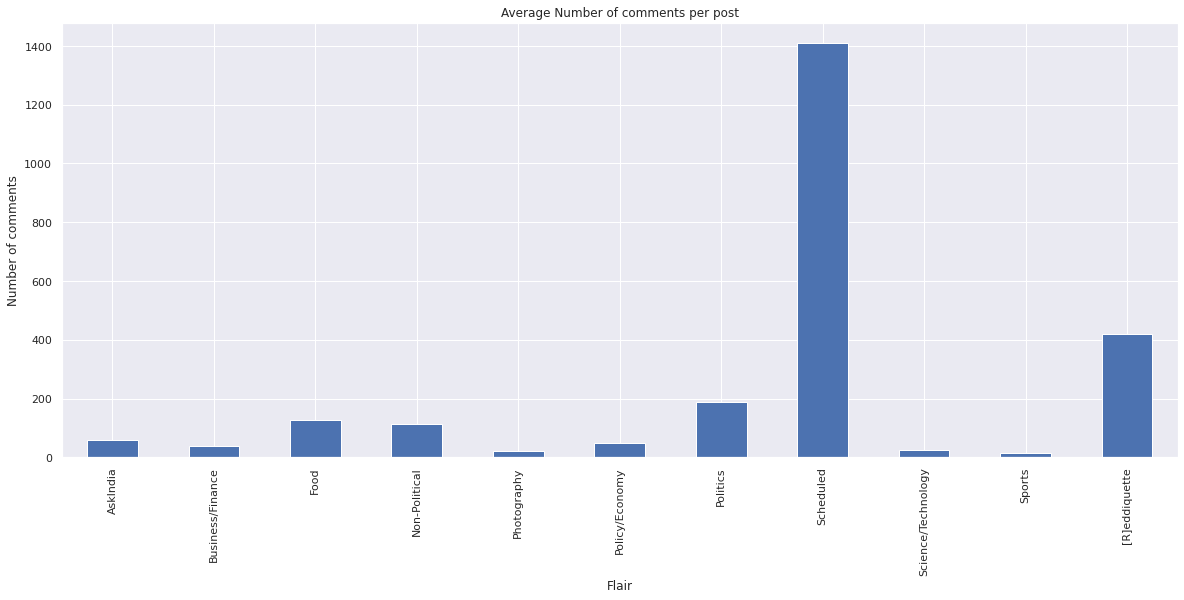

In [19]:
df3 = df.groupby("flair").mean()[['comms_num']]

df3.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of comments per post")

plt.xlabel("Flair")
plt.ylabel("Number of comments")


df3.head(10)



In [20]:
df.body.fillna(" ",inplace=True)

## Generating Word Clouds for the Dataset

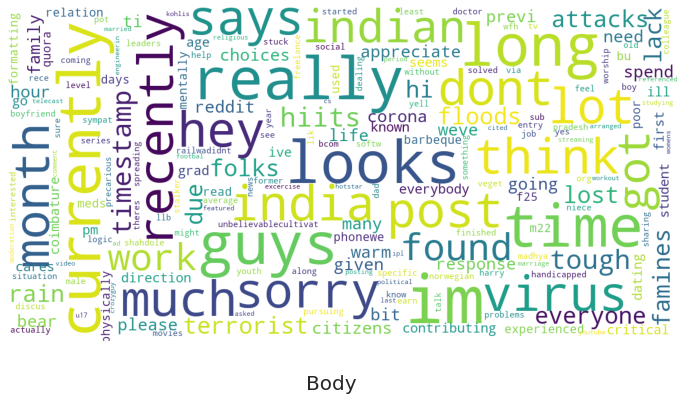

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.body,"Body")

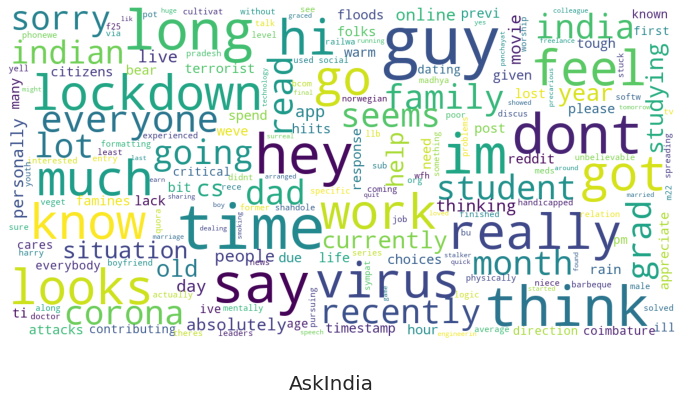

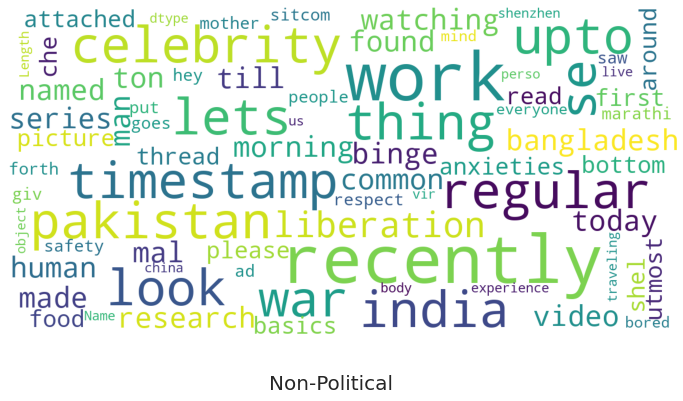

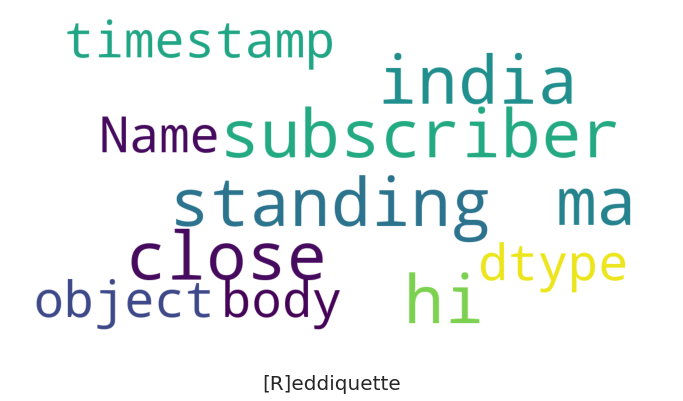

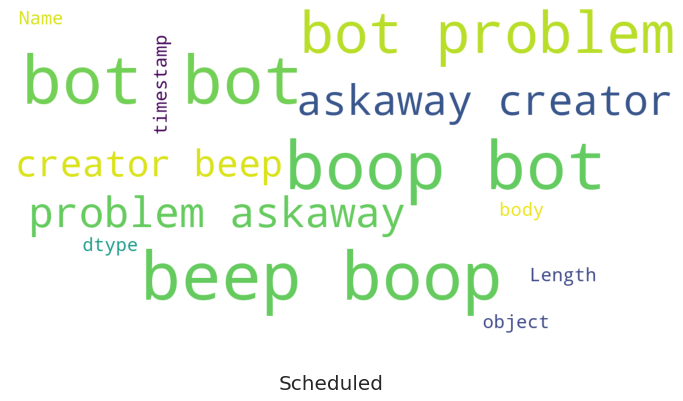

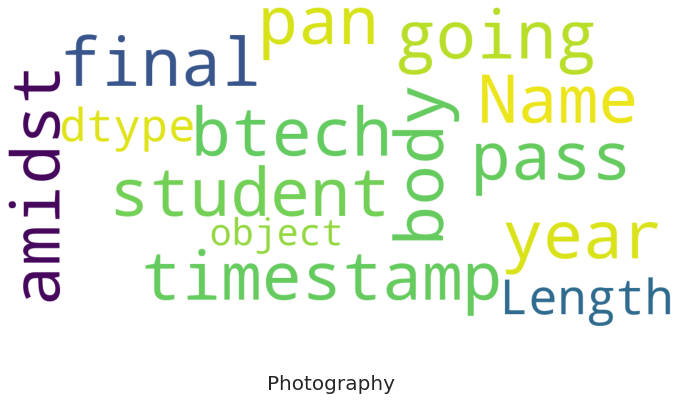

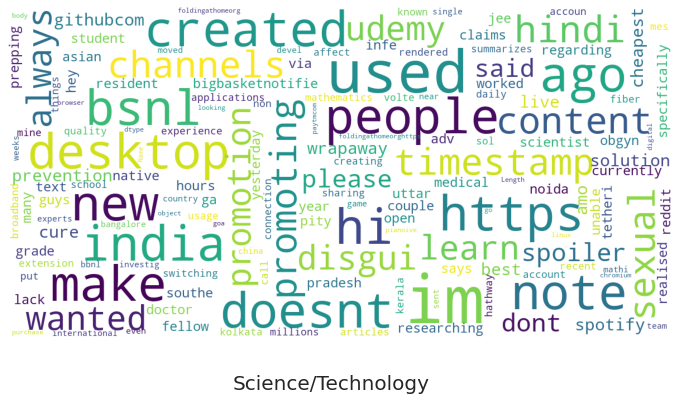

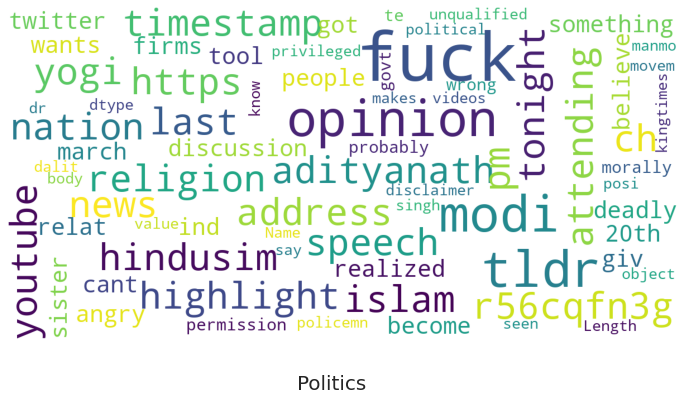

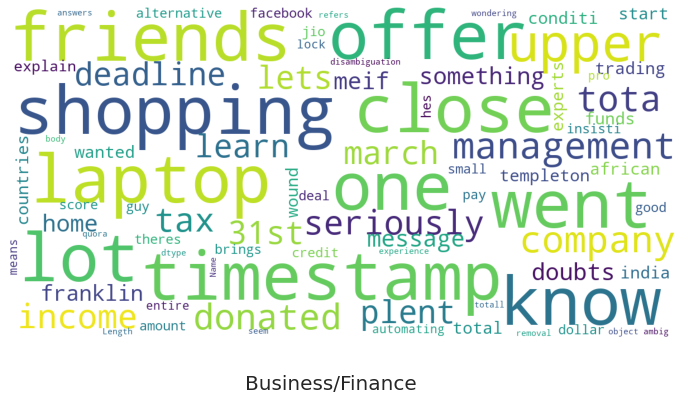

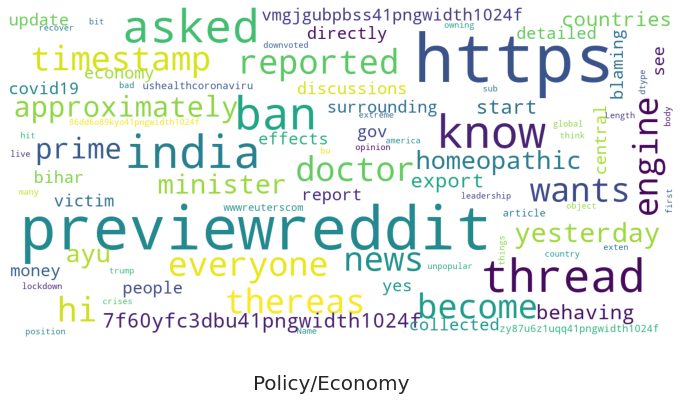

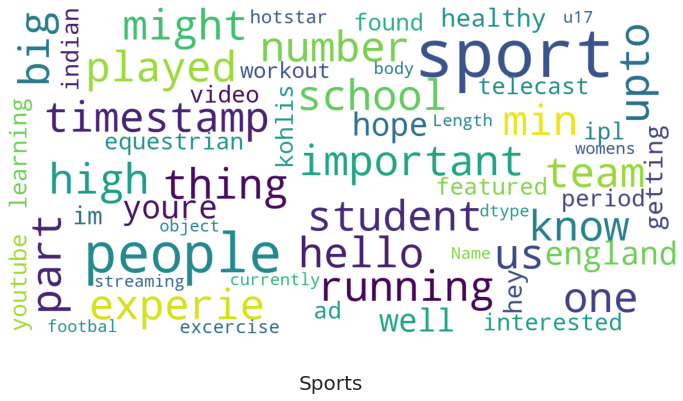

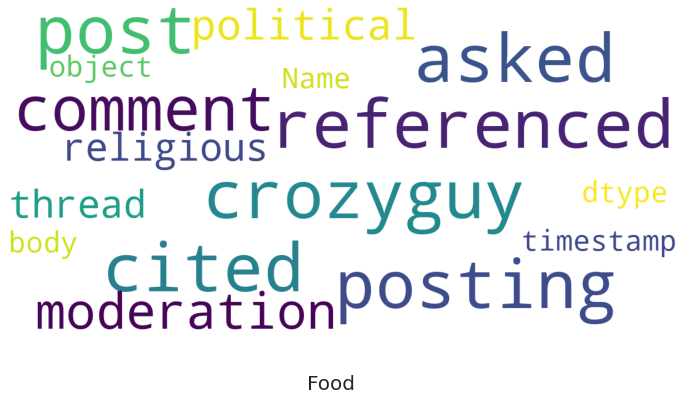

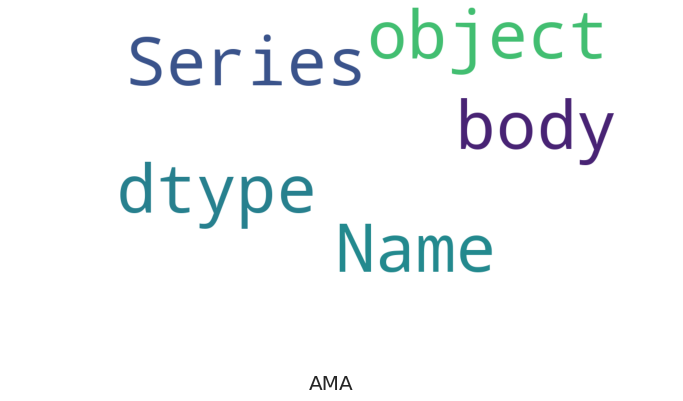

In [24]:


for flair in flairs:
    show_wordcloud(df[df['flair'] == flair]['body'],flair)



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

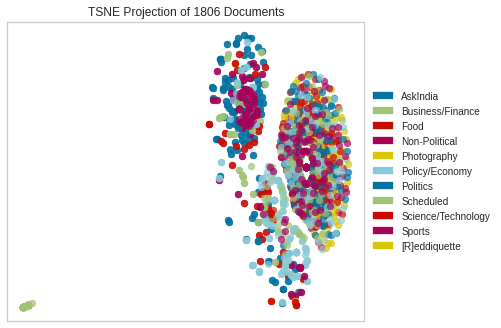

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df.body)
y = df.flair

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()